# Which Phone Plan is Better?

The telecom operator, Megaline, offers its clients two prepaid phone plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget. The data on 500 Megaline clients from 2018 will be used to analyze clients' behavior and determine which prepaid plan brings in more revenue. 

**Description of the phone plans:**

**Surf**
1. Monthly charge: \$20
2. 500 monthly minutes, 50 texts, and 15 GB of data
3. After exceeding the package limits:
  * 1 minute: 3 cents
  * 1 text message: 3 cents
  * 1 GB of data: $10


**Ultimate**
1. Monthly charge: \$70
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data
3. After exceeding the package limits:
  * 1 minute: 1 cent
  * 1 text message: 1 cent
  * 1 GB of data: $7

## Initialization

In [71]:
# Loading all libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import math

In [72]:
# Loading the data
try:
   calls = pd.read_csv('megaline_calls.csv')
   internet = pd.read_csv('megaline_internet.csv')
   messages = pd.read_csv('megaline_messages.csv')
   plans = pd.read_csv('megaline_plans.csv')
   users = pd.read_csv('megaline_users.csv')
except:
  calls = pd.read_csv('/datasets/megaline_calls.csv')
  internet = pd.read_csv('/datasets/megaline_internet.csv')
  messages = pd.read_csv('/datasets/megaline_messages.csv')
  plans = pd.read_csv('/datasets/megaline_plans.csv')
  users = pd.read_csv('/datasets/megaline_users.csv')

## Data Exploration

Description of the data for the `users` table (data on users):
* `user_id` — unique user identifier
* `first_name` — user's name
* `last_name` — user's last name
* `age` — user's age (years)
* `reg_date` — subscription date (dd, mm, yy)
* `churn_date` — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
* `city` — user's city of residence
* `plan` — calling plan name



In [73]:
# Obtaining the first 5 rows of the users table
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [74]:
# Obtaining the number of rows and columns in the users table 
shape = users.shape

print('The users table has {} rows and {} columns'.format(shape[0],shape[1]))

The users table has 500 rows and 8 columns


In [75]:
# Obtaining general information for the users table 
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Since the `users` table has 500 rows, we see that there are missing values in the `churn_date` column.

In [76]:
# Percentage of missing values per column in the users table
users_mis = users.isna().sum().to_frame('missing_values')
users_mis['%'] = round(100 * users.isna().sum() / len(users), 1)
print(users_mis.sort_values(by='%', ascending=False))

            missing_values     %
churn_date             466  93.2
user_id                  0   0.0
first_name               0   0.0
last_name                0   0.0
age                      0   0.0
city                     0   0.0
reg_date                 0   0.0
plan                     0   0.0


There are 466 missing values in the `churn_date` column, which is equivalent to 93.2% missing data.

Description of the data for the `calls` table (data on calls):
* `id` — unique call identifier
* `call_date` — call date
* `duration` — call duration (in minutes)
* `user_id` — the identifier of the user making the call

In [77]:
# Obtaining the first five rows of the calls table
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [78]:
# Obtaining the number of rows and columns in the calls table 
shape = calls.shape

print('The calls table has {} rows and {} columns'.format(shape[0],shape[1]))

The calls table has 137735 rows and 4 columns


In [79]:
# Obtaining general information for the calls table 
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


There are no missing values in the `calls` table. Each column has exactly 137,735 rows.

Description of the data for the `messages` table (data on texts):
* `id` — unique text message identifier
* `message_date` — text message date
* `user_id` — the identifier of the user sending the text

In [80]:
# Obtaining the first five rows for the messages table 
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [81]:
# Obtaining the number of rows and columns in the messages table 
shape = messages.shape

print('The messages table has {} rows and {} columns'.format(shape[0],shape[1]))

The messages table has 76051 rows and 3 columns


In [82]:
# Obtaining general information for the messages table
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


There are no missing values in the `messages` table. Each column has exactly 76,051 rows. 

Description of the data for the `internet` table (data on web sessions):
* `id` — unique session identifier
* `mb_used` — the volume of data spent during the session (in megabytes)
* `session_date` — web session date
* `user_id` — user identifier

In [83]:
# Obtaining the first five rows for the internet table 
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [84]:
# Obtaining the number of rows and columns in the internet table 
shape = internet.shape

print('The internet table has {} rows and {} columns'.format(shape[0],shape[1]))

The internet table has 104825 rows and 4 columns


In [85]:
# Obtaining general information about the internet table
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


There are no missing values in the `internet` table. Each column has exactly 104,825 rows. 

Description of the data for the `plans` table (data on the plans):
* `plan_name` — calling plan name
* `usd_monthly_fee` — monthly charge in US dollars
* `minutes_included` — monthly minute allowance
* `messages_included` — monthly text allowance
* `mb_per_month_included` — data volume allowance (in megabytes)
* `usd_per_minute` — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
* `usd_per_message` — price per text after exceeding the package limits
* `usd_per_gb` — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

In [86]:
# Obtaining the first five rows for the plans table
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [87]:
# Obtaining the number of rows and columns in the plans table 
shape = plans.shape

print('The plans table has {} rows and {} columns'.format(shape[0],shape[1]))

The plans table has 2 rows and 8 columns


In [88]:
# Obtaining general info about the plans table
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


There are no missing values in the `plans` table. Each column has exactly 2 rows. 

**Conclusions**

We loaded five different datasets: `calls`, `internet`, `messages`, `plans`, and `users`. 

The `calls` table has 137,735 rows and 4 columns. Since column names follow rules of good style, no change will be needed there. There was no missing data in this table. The values in the `call_date` column need to be converted from string type to datetime. 

The `internet` table has 104,825 rows and 4 columns. Since column names follow rules of good style, no change will be needed there. There was no missing data in this table.

The `messages` table has 76,051 rows and 3 columns. Since column names follow rules of good style, no change will be needed there. There was no missing data in this table. The values in the `message_date` column need to be converted from string type to datetime. 

The `plans` table has  2 rows and 8 columns. Since column names follow rules of good style, no change will be needed there. There was no missing data in this table.

The `users` table has 500 rows and 8 columns. Since column names follow rules of good style, no change will be needed there. Over 90% of the values in the  `churn_date` column were missing. The values in the `reg_date` and `churn_date` columns need to be converted from string type to datetime. 

We will now preprocess the data to deal with missing values, duplicated data, and to change datatype. 

## Data Preprocessing

### `calls` table

In [89]:
# Calculating number of missing values per column
calls.isna().sum().sort_values(ascending=False)

id           0
user_id      0
call_date    0
duration     0
dtype: int64

No missing values in the `calls` table.

In [90]:
# Checking for duplicates
calls.duplicated().sum()

0

There are no duplicates in the `calls` table. 

In [91]:
# Getting datatypes for each column
calls.dtypes

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

Since the values in the `call_date` column are written as strings, we will convert them to datetime format so it is easier for Python to read. 

In [92]:
# Converting call_date column to datetime format
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

# Checking to see if call_date has been converted to datetime 
calls.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

In [93]:
# Adding column for month in call_date
calls['call_month'] = pd.DatetimeIndex(calls['call_date']).month

In [94]:
# Rounding up call duration
calls['duration'] = np.ceil(calls['duration'])

# Checking for unique values in the duration column
print(calls['duration'].unique())

[ 9. 14. 15.  6.  5.  3. 13.  2.  4. 10. 11.  1. 16.  0.  7.  8. 30. 12.
 19. 17. 22. 27. 21. 20. 18. 26. 23. 24. 25. 28. 33. 32. 29. 31. 36. 38.
 34. 37.]


In [95]:
# Checking data after manipulations
calls.head()

,id,user_id,call_date,duration,call_month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


**Conclusions**

There were no missing values or duplicated data in the `calls` table. We converted the values in the `call_date` column from string format to datetime format. We added a month column for `call_date` and called it `call_month`. We rounded all values in the `duration` column up.

### `internet` table

In [96]:
# Calculating number of missing values per column
internet.isna().sum().sort_values(ascending=False)

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

There are no missing values in the `internet` table.

In [97]:
# Checking for duplicates
internet.duplicated().sum()

0

There are no duplicates in the `internet` table. 

In [98]:
# Getting datatypes for each column
internet.dtypes

id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

Since the values in the `session_date` column are written as strings, we will convert them to datetime format so it is easier for Python to read.

In [99]:
# Converting session_date column to datetime format
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

# Checking to see if session_date has been converted to datetime
internet.dtypes

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

In [100]:
# Adding column for month in session_date
internet['session_date_month'] = pd.DatetimeIndex(internet['session_date']).month

In [101]:
# Adding column for gb used
internet['gb_used'] = internet['mb_used']/1024

In [102]:
# Checking data after manipulations
internet.head()

,id,user_id,session_date,mb_used,session_date_month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590


**Conclusions**

There were no missing values or duplicated data in the `internet` table. The values in the `session_date` column were converted from string type to datetime format. We added a month column for `session_date` and called it `session_date_month`. We also added a column for gb used and called it `gb_used`. The `mb_used` and `gb_used` columns were rounded up. 

### `messages` table

In [103]:
# Calculating number of missing values per column
messages.isna().sum().sort_values(ascending=False)

id              0
user_id         0
message_date    0
dtype: int64

There are no missing values in the `messages` table.

In [104]:
# Checking for duplicates
messages.duplicated().sum()

0

There are no duplicated data in the `messages` table. 

In [105]:
# Getting for datatypes for each column 
messages.dtypes

id              object
user_id          int64
message_date    object
dtype: object

Since the values in the `message_date` column are written as strings, we will convert them to datetime format so it is easier for Python to read.

In [106]:
# Converting message_date column to datetime format
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

# Checking to see if message_date has been converted to datetime
messages.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

In [107]:
# Adding column for month in message_date
messages['message_date_month'] = pd.DatetimeIndex(messages['message_date']).month

In [108]:
# Checking data after manipulations
messages.head()

,id,user_id,message_date,message_date_month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


**Conclusions**

There were no missing values or duplicated data in the `messages` table. The values in the `message_date` column were converted from string type to datetime format. We added a month column for `message_date` and called it `message_date_month`.

### `plans` table

In [109]:
# Calculating number of missing values per column
plans.isna().sum().sort_values(ascending=False)

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

There are no missing values in the `plans` table.

In [110]:
# Checking for duplicated data
plans.duplicated().sum()

0

There are no duplicated data in the `plans` table.

In [111]:
# Getting datatypes for each column 
plans.dtypes

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

Since everything looks good, we will leave the data in the `plans` table alone.

### `users` table

In [112]:
# Calculating number of missing values per column
users.isna().sum().sort_values(ascending=False)

churn_date    466
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
dtype: int64

In [113]:
# Calculating percentage of missing values in the cylinders column
mis_churn_date = users['churn_date'].isna().sum() / len(users)
print(f'Percent of missing values in the churn_date column: {mis_churn_date:.1%}')

Percent of missing values in the churn_date column: 93.2%


The `churn_date` column is the date the user stopped using the service. The missing values are due to customers who are still using the service. To deal with this, we will replace missing values with December 31, 2018 (since only data from 2018 is used in this project). 

In [114]:
# Replacing missing values in the churn_date column
users['churn_date'].fillna('2018-12-31', inplace=True)

# Checking to see if missing values have been replaced
users['churn_date'].isna().sum()

0

In [115]:
# Checking for duplicates
users.duplicated().sum()

0

There are no duplicated data in the `users` table.

In [116]:
# Checking datatypes for each column 
users.dtypes

user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

Since the values in the `churn_date` and `reg_date` columns are written as strings, we will convert them to datetime format so it is easier for Python to read.

In [117]:
# Converting churn_date and reg_date columns to datetime format
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# Checking to see if churn_date and reg_date have been converted to datetime
users.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

In [118]:
# Checking data after manipulaitons
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Conclusions**

Since the `churn_date` column represents the date the user stopped using the service, we replaced all missing data in this column with 2018-12-31. The values in the `churn_date` and `reg_date` columns were converted from string type to datetime format.

### Calculations

For each user, we can now find:
* The number of calls made and minutes used per month
* The number of text messages sent per month
* The volume of data per month
* The monthly revenue from each user

In [119]:
# Calculating the number of calls made and minutes used per month
groupby_calls = calls.groupby(['user_id', 'call_month'])['duration'].agg(['count','sum'])

# Renaming columns
groupby_calls.columns = ['monthly_calls_made', 'monthly_minutes_used']

# Printing first 5 rows of the table
groupby_calls.head()

monthly_calls_made  monthly_minutes_used
user_id call_month                                          
1000    12                          16                 124.0
1001    8                           27                 182.0
        9                           49                 315.0
        10                          65                 393.0
        11                          64                 426.0

In [120]:
# Calculating the number of text messages sent per month
groupby_messages = messages.groupby(['user_id', 'message_date_month']).agg({'message_date_month':'sum'})

# Renaming columns
groupby_messages.columns = ['monthly_messages_sent']

# Printing first five rows of the table
groupby_messages.head()

monthly_messages_sent
user_id message_date_month                       
1000    12                                    132
1001    8                                     240
        9                                     396
        10                                    530
        11                                    396

In [121]:
# Calculating the volume of data per month
groupby_internet = internet.groupby(['user_id', 'session_date_month']).agg({'mb_used':'sum','gb_used':'sum'})

# Renaming columns
groupby_internet.columns = ['total_mb_used', 'total_gb_used']

# Rounding up total_mb_used and total_gb_used
groupby_internet['total_mb_used'] = np.ceil(groupby_internet['total_mb_used'])
groupby_internet['total_gb_used'] = np.ceil(groupby_internet['total_gb_used'])

# Printing table first five rows of the table
groupby_internet.head()

total_mb_used  total_gb_used
user_id session_date_month                              
1000    12                         1902.0            2.0
1001    8                          6920.0            7.0
        9                         13315.0           14.0
        10                        22331.0           22.0
        11                        18505.0           19.0

We will now combine our newly formed tables so that we can calculate the monthly revenue from each user.

In [122]:
# Merging tables: groupby_calls, groupby_messages, and groupby_internet
df = pd.concat([groupby_calls, groupby_messages, groupby_internet], axis=1).reset_index().fillna(0)

#Renaming columns
df.columns = ['user_id', 'month', 'calls_made', 'call_duration', 'messages_sent', 'mb_used', 'gb_used']

# Merging users table with agg_df 
df = users.merge(df, on='user_id')

# Merging agg_df with plans table
plans = plans.rename(columns={'plan_name':'plan'})
df = df.merge(plans, on='plan')

# Printing first 5 rows of our newly formed table
df.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,calls_made,...,messages_sent,mb_used,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,12,16.0,...,132.0,1902.0,2.0,1000,30720,3000,70,7,0.01,0.01
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11,2.0,...,165.0,2069.0,3.0,1000,30720,3000,70,7,0.01,0.01
2,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,12,9.0,...,1668.0,32119.0,32.0,1000,30720,3000,70,7,0.01,0.01
3,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31,10,71.0,...,210.0,17107.0,17.0,1000,30720,3000,70,7,0.01,0.01
4,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31,11,63.0,...,407.0,23677.0,24.0,1000,30720,3000,70,7,0.01,0.01


In [123]:
# Calculating the number of minutes used from plan 
df['minutes_used_plan'] = df['calls_made'] - df['minutes_included']

# Calculating the number of messages used from plan
df['messages_used_plan'] = df['messages_sent'] - df['messages_included']

# Calculating amount of data used from plan
df['gb_used_plan'] = df['gb_used'] - (df['mb_per_month_included']/1024)

In [124]:
# Creating a function that calculates the monthly revenue from each user
def monthly_revenue(row):
  revenue = 0
  if row['minutes_used_plan'] > 0:
    revenue += row['minutes_used_plan'] * row['usd_per_minute']

  if row['messages_used_plan'] > 0:
    revenue += row['messages_used_plan'] * row['usd_per_message']

  if row['gb_used_plan'] > 0:
    revenue += row['gb_used_plan'] * row['usd_per_gb']

  return revenue + row['usd_monthly_pay']

In [125]:
# Creating monthly revenue column from our defined function above
df['monthly_revenue'] = df.apply(monthly_revenue, axis=1)

# Checking to see if new column was added 
df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,calls_made,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,minutes_used_plan,messages_used_plan,gb_used_plan,monthly_revenue
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,12,16.0,...,30720,3000,70,7,0.01,0.01,-2984.0,-868.0,-28.0,70.00
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11,2.0,...,30720,3000,70,7,0.01,0.01,-2998.0,-835.0,-27.0,70.00
2,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,12,9.0,...,30720,3000,70,7,0.01,0.01,-2991.0,668.0,2.0,90.68
3,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31,10,71.0,...,30720,3000,70,7,0.01,0.01,-2929.0,-790.0,-13.0,70.00
4,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31,11,63.0,...,30720,3000,70,7,0.01,0.01,-2937.0,-593.0,-6.0,70.00


In [126]:
# Checking our data after manipulations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   first_name             2293 non-null   object        
 2   last_name              2293 non-null   object        
 3   age                    2293 non-null   int64         
 4   city                   2293 non-null   object        
 5   reg_date               2293 non-null   datetime64[ns]
 6   plan                   2293 non-null   object        
 7   churn_date             2293 non-null   datetime64[ns]
 8   month                  2293 non-null   int64         
 9   calls_made             2293 non-null   float64       
 10  call_duration          2293 non-null   float64       
 11  messages_sent          2293 non-null   float64       
 12  mb_used                2293 non-null   float64       
 13  gb_

**Conclusions**

For each user, we calculated:
* The number of calls and minutes used per month
* The number of text messages sent per month
* The volume of data per month

We then grouped tables together to calculate the monthly revenue from each user. We stored all calculations in seperate columns in our newly created `df` table. 

We will now carry out exploratory data analysis to describe the customers' behavior.

## Exploratory Data Analysis (EDA)

In [127]:
# Calculating the mean, dispersion, and standard deviation for minutes, messages, and data used per plan 
df.groupby('plan')['call_duration', 'messages_sent', 'gb_used'].agg(['mean','var', 'std'])

/tmp/ipykernel_84/681104410.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('plan')['call_duration', 'messages_sent', 'gb_used'].agg(['mean','var', 'std'])


call_duration                           messages_sent                 \
                  mean           var         std          mean            var   
plan                                                                            
surf        428.749523  54968.279461  234.453150    299.401780  121948.706155   
ultimate    430.450000  57844.464812  240.508762    358.215278  133950.539126   

                        gb_used                      
                 std       mean       var       std  
plan                                                 
surf      349.211549  16.670693  61.58360  7.847522  
ultimate  365.992540  17.306944  58.83055  7.670108

We can see that users with the ultimate plan on average use more minutes, send more messages, and use more data than users with the surf plan. Now lets see if we get the same results when we remove outliers for the ultimate plan and surf plan. 

In [128]:
# Extracting filtered data for the ultimate plan
ultimate = df.query('plan == "ultimate"')
ultimate_plan = ultimate[['calls_made', 'call_duration', 'messages_sent', 'gb_used', 'monthly_revenue']]

# Removing outliers for the ultimate plan 
ultimate_plan_filtered = ultimate_plan[(np.abs(st.zscore(ultimate_plan)) < 3).all(axis=1)]

# Getting statistical summary for the ultimate plan without outliers
ultimate_plan_filtered.describe()

,calls_made,call_duration,messages_sent,gb_used,monthly_revenue
count,676.000000,676.000000,676.000000,676.000000,676.000000
mean,59.085799,419.217456,322.806213,16.446746,70.522189
std,29.715965,215.192734,320.496341,6.698489,3.235619
min,0.000000,0.000000,0.000000,0.000000,70.000000
25%,36.000000,262.000000,36.000000,13.000000,70.000000
50%,60.000000,420.500000,243.000000,17.000000,70.000000
75%,78.000000,550.250000,528.000000,20.000000,70.000000
max,150.000000,1111.000000,1404.000000,35.000000,105.000000


In [129]:
# Finding dispersion for the ultimate plan
for i in ultimate_plan_filtered:
  ultimate_plan_filtered[i].var()
  print('Variance of ' + i + ': {:.2f}'.format(ultimate_plan_filtered[i].var()))

Variance of calls_made: 883.04
Variance of call_duration: 46307.91
Variance of messages_sent: 102717.90
Variance of gb_used: 44.87
Variance of monthly_revenue: 10.47


On average, users with the ultimate plan make 58 calls, use 416 minutes, send 328 messages, and use 40 gb worth of data per month. The dispersions for `calls_duration`, `messages_sent`, and `gb_used` for the ultimate plan is 47147, 104363, and 257 respectively. On average, the monthly revenue generated from users with the ultimate plan is \$163.48.

In [130]:
# Extracting filtered data for the surf plan
surf = df.query('plan == "surf"')
surf_plan = surf[['calls_made', 'call_duration', 'messages_sent', 'gb_used', 'monthly_revenue']]

# Removing outliers for the surf plan 
surf_plan_filtered = surf_plan[(np.abs(st.zscore(surf_plan)) < 3).all(axis=1)]

# Getting statistical summary for the surf plan without outliers
surf_plan.describe()

,calls_made,call_duration,messages_sent,gb_used,monthly_revenue
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,59.811825,428.749523,299.401780,16.670693,66.527057
std,32.017989,234.453150,349.211549,7.847522,56.963000
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,39.000000,272.000000,18.000000,12.000000,25.100000
50%,60.000000,425.000000,198.000000,17.000000,49.460000
75%,79.000000,576.000000,430.000000,21.000000,89.300000
max,205.000000,1510.000000,3192.000000,70.000000,613.860000


In [131]:
# Finding dispersion for the surf plan 
for i in surf_plan_filtered:
  surf_plan_filtered[i].var()
  print('Variance of ' + i + ': {:.2f}'.format(surf_plan_filtered[i].var()))

Variance of calls_made: 929.77
Variance of call_duration: 49798.47
Variance of messages_sent: 83766.12
Variance of gb_used: 49.09
Variance of monthly_revenue: 2046.01


On average, users with the surf plan make 58 calls, use 428 minutes, send 299 messages, and use 40 gb worth of data per month. The dispersions for calls_duration, messages_sent, and gb_used for the ultimate plan is 49861, 86068, and 289 respectively. On average, the monthly revenue generated from users with the surf plan is \$164.11

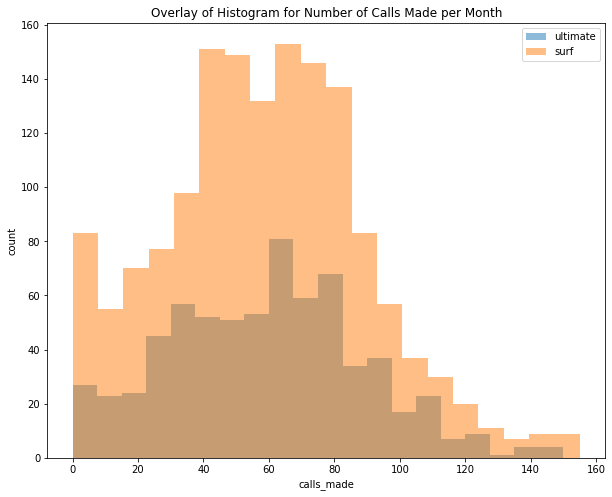

In [132]:
# Plotting a histogram for number of calls made per month for both plans
plt.figure(figsize=(10,8))
plt.hist(ultimate_plan_filtered['calls_made'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['calls_made'], bins=20, alpha=0.5, label='surf')

# Adding title and axes label
plt.xlabel('calls_made')
plt.ylabel('count')
plt.title('Overlay of Histogram for Number of Calls Made per Month')
plt.legend()

From the overlay of the histogram plot, we can see that the surf plan had the most representation for the number of calls per month.

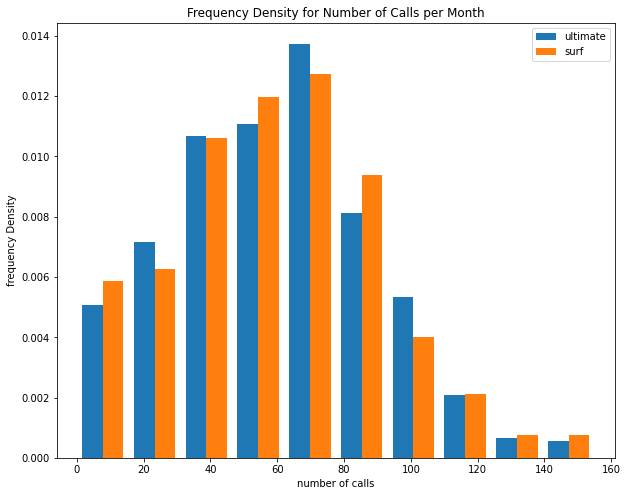

In [133]:
# Plotting a density histogram of number of calls per month for both plans
plt.figure(figsize=(10,8))
plt.hist([ultimate_plan_filtered['calls_made'], surf_plan_filtered['calls_made']], label= ['ultimate', 'surf'], density = True)


# Adding title and axes label
plt.ylabel('frequency Density')
plt.xlabel('number of calls')
plt.title('Frequency Density for Number of Calls per Month')
plt.legend()

With the frequency density plot, we can see the number of calls made per users across phone plan. We can see that the surf plan has more number of calls than the ultimate plan.

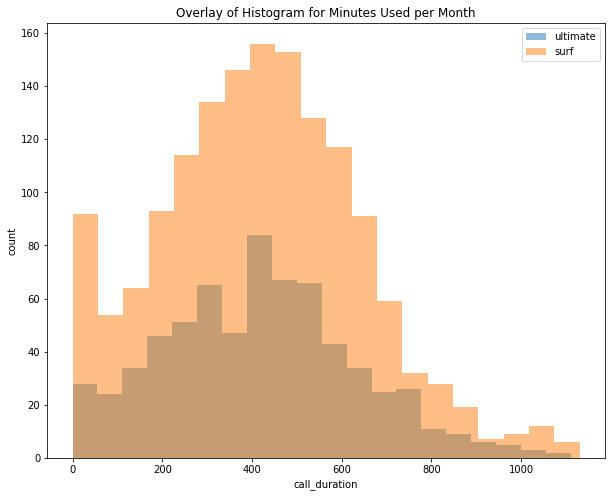

In [134]:
# Plotting a historgram for minutes used per month for both plans
plt.figure(figsize=(10,8))
plt.hist(ultimate_plan_filtered['call_duration'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['call_duration'], bins=20, alpha=0.5, label='surf')

# Adding title and axes label
plt.title('Overlay of Histogram for Minutes Used per Month')
plt.xlabel('call_duration')
plt.ylabel('count')
plt.legend()

From the overlay of the histograms, we can see that users of the surf plan use more minutes per month.

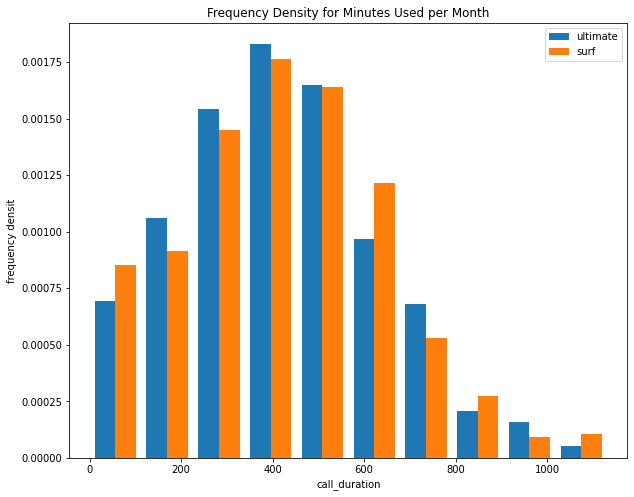

In [135]:
# Plotting a density histogram of minutes used per month for both plans
plt.figure(figsize=(10,8))
plt.hist([ultimate_plan_filtered['call_duration'], surf_plan_filtered['call_duration']], label=['ultimate', 'surf'], density=True)

# Adding title and axes label
plt.title('Frequency Density for Minutes Used per Month')
plt.xlabel('call_duration')
plt.ylabel('frequency densit')
plt.legend()

From the frequency density histogram, we can see that more users in the ultimate plan spend less time on their phone conversations than users with the surf plan. Most users in the the ultimate plan spend on average less than 600 minutes (10 hours) on their phones. 

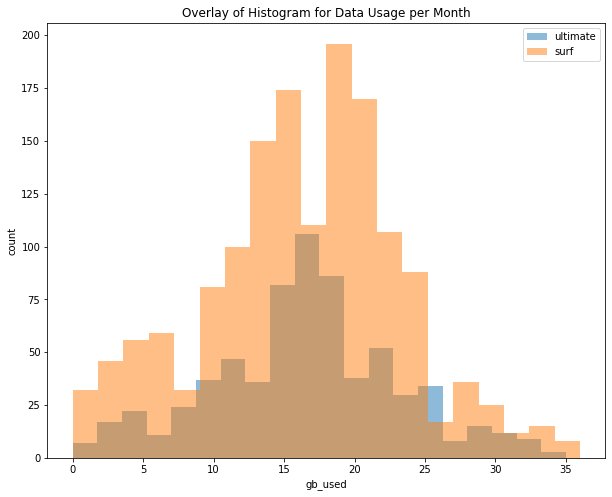

In [136]:
# Plotting a historgram for data usage (in gb) per month for both plans
plt.figure(figsize=(10,8))
plt.hist(ultimate_plan_filtered['gb_used'], bins=20, alpha=0.5, label='ultimate')
plt.hist(surf_plan_filtered['gb_used'], bins=20, alpha=0.5, label='surf')

# Adding title and axes label
plt.title('Overlay of Histogram for Data Usage per Month')
plt.xlabel('gb_used')
plt.ylabel('count')
plt.legend()

From the overlay of the histograms, we can see that people with the surf plan tend to use more data than people with ultimate plan. 

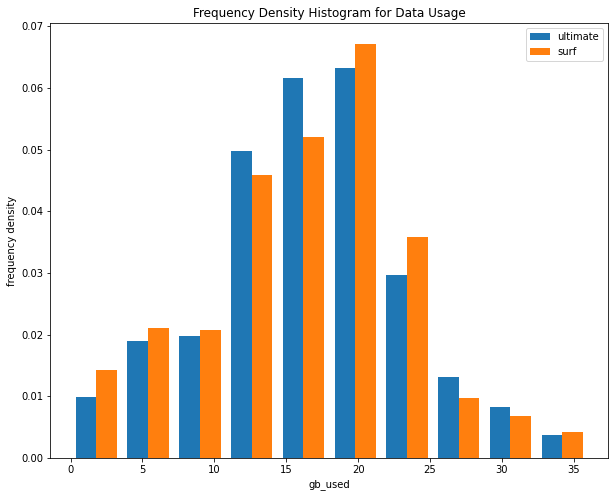

In [137]:
# Plotting a density historgram for data usage (in gb) per month for both plans
plt.figure(figsize=(10,8))
plt.hist([ultimate_plan_filtered['gb_used'], surf_plan_filtered['gb_used']], label=['ultimate','surf'], density=True)

# Adding title and axes label
plt.title('Frequency Density Histogram for Data Usage')
plt.xlabel('gb_used')
plt.ylabel('frequency density')
plt.legend()

From the frquency density histogram, we can see there is a higher proportion of users that use their data more frequently than users with the ultimate plan. 

In [138]:
# Calculating average revenue for ultimate plan
ultimate_rev_avg = ultimate_plan_filtered['monthly_revenue'].sum()/len(ultimate_plan_filtered['monthly_revenue'])
print(f'Average revenue for users with the ultimate plan: ${ultimate_rev_avg:.2f}')

# Calculating average revenue for surf plan
surf_rev_avg = surf_plan_filtered['monthly_revenue'].sum()/len(surf_plan_filtered['monthly_revenue'])
print(f'Average revenue for users with the surf plan: ${surf_rev_avg:.2f}')

# Difference in revenue between the 2 plans
revenue_diff = (surf_rev_avg - ultimate_rev_avg)/surf_rev_avg * 100
print(f'Difference in revenue between the ultimate plan and surf plan: {revenue_diff:.1f}%') 

Average revenue for users with the ultimate plan: $70.52
Average revenue for users with the surf plan: $61.14
Difference in revenue between the ultimate plan and surf plan: -15.3%


**Conclusions**

We determined that ultimate users on the average make 58 calls, use 416 minutes per month, sent about 328 messages, and use 41 GB of data per month. For surf users, we found that on average users make 58 calls, use 429 minutes per month, sent about 299 messages, and use 40 GB of data per month. We plotted the distribution and the frequency density of the plans per user and observed that surf users have more representation overall than ultimate users. We found that users with the surf plan brought in more revenue than users with the ultimate plan. There was a 40% difference in revenue between the two plans. 

## Testing Hypotheses 

### Test 1

**Null hypothesis (H$_{0}$):** There is no difference between the average revenue from users of the Ultimate and Surf calling plans. 

**Alternative hypothesis (H$_{1}$):** There is a difference between the average revenue from users of the Ultimate and Surf calling plans. 

We will use a significance level (or alpha) of 0.05, which indicates a 5% risk of concluding that a difference exists when there is no actual difference. We will use a t-test to test the hypothesis.

* H$_{0}$: average revenue for users of Ultimate plan = average revenue of Surf plan

* H$_{1}$: average revenue for users of Ultimate plan $\neq$ average revenue of Surf plan  

* $\alpha$: 0.05

* If p-value <= significance level ($\alpha$) then we reject our null hypthesis.



In [139]:
# Hypothesis testing
ultimate = ultimate_plan_filtered['monthly_revenue']
surf = surf_plan_filtered['monthly_revenue']

# Setting significance level
alpha = 0.05 

# Formulating t-test
results = st.ttest_ind(ultimate,surf, equal_var=False)

print('pvalue:', results.pvalue)

print()

if results.pvalue < alpha:
  print('We reject the null hypothesis')

else:
  print('We cannot reject the null hypothesis')

pvalue: 2.0280554940717037e-15

We reject the null hypothesis


Since the p-value is less than 0.05, we reject the null hypothesis. This suggests that there is a difference between average revenue from users of Ultimate and Surf calling plans 

### Test 2

**Null hypothesis (H$_{0}$):** There is no difference between the average revenue from users in NY-NJ area is different from that of the users from other regions.

**Alternative hypothesis (H$_{1}$):** There is a difference between the average revenue from users in NY-NJ area is different from that of the users from other regions.

We will use a significance level (or alpha) of 0.05, which indicates a 5% risk of concluding that a difference exists when there is no actual difference. We will use a t-test to test the hypothesis.

* H$_{0}$: average revenue for users in NY-NJ area = average revenue of other regions

* H$_{1}$: average revenue for users in NY-NJ area $\neq$ average revenue of other regions

* $\alpha$: 0.05

* If p-value <= significance level ($\alpha$) then we reject our null hypthesis.

In [140]:
# Hypothesis testing
ny_nj = df.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['monthly_revenue']
not_ny_nj = df.query ('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['monthly_revenue']

# Setting significance level
alpha = 0.05

# Formulating t-test
results = st.ttest_ind(ny_nj,not_ny_nj, equal_var=False)

print('pvalue:', results.pvalue)

print()

if results.pvalue < alpha:
  print('We reject the null hypothesis')

else:
  print('We cannot reject the null hypothesis')

pvalue: 0.01480036990805003

We reject the null hypothesis


Since the p-value is less than 0.05, we reject the null hypothesis. This suggests that there is a difference the average revenue from users in NY-NJ area is.

# Findings

We determined that Ultimate users on the average make 58 calls, use 416 minutes per month, sent about 328 messages, and use 41 GB of data per month. For Surf users, we found that on average users make 58 calls, use 429 minutes per month, sent about 299 messages, and use 40 GB of data per month.


We plotted the distribution and the frequency density of the plans per user and observed that Surf users have more representation overall than ultimate users. From our plot, we can see that users with the Surf plan made more calls, spent more time on phone conversations, sent more text messags, and used more data per month than users with the Ultimate plan. 


We found that the average revenue for users with the ultimate plan was 163.48 dollars, while the average revenue for users with the surf plan was 283.31 dollars. The difference in revenue between the ultimate plan and surf plan: 42.3%.


We performed a t-test to test two hypothesis:
* The average revenue from users of Ultimate and Surf calling plans differs.

* The average revenue from users in NY-NJ area is different from that of the users from other regions.

We stated that our significance level was 0.05, which indicates a 5% risk of concluding that a difference exists when there is no actual difference.

From our t-test, we concluded:

* We rejected our null hypothesis and state that there is a difference between the average revenue from users of Ultimate and Surf calling plans.
  * The Surf plan is more profitable than the Ultimate plan.

* We rejected our other null hypothesis and stated that there is a difference between average revenue from users in the New York-New Jersey area and other regions.
